In [1]:
!pip uninstall -y scikit-learn imbalanced-learn
!pip install --no-cache-dir scikit-learn==1.3.2 imbalanced-learn==0.11.0

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 223.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 297.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Jan2309jr/Personality-Prediction/refs/heads/main/Dataset/train.csv')

In [4]:
df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
5,5,2.0,No,8.0,5.0,No,NaN,3.0,Extrovert
6,6,1.0,No,8.0,NaN,No,NaN,4.0,Extrovert
7,7,2.0,No,8.0,3.0,No,4.0,5.0,Extrovert
8,8,4.0,Yes,2.0,1.0,NaN,0.0,2.0,Introvert
9,9,1.0,No,8.0,6.0,No,14.0,9.0,Extrovert


In [5]:
df.shape

(18524, 9)

In [6]:
df.isnull().sum().sum()

9196

In [7]:
df.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [8]:
df.nunique()

id                           18524
Time_spent_Alone                12
Stage_fear                       2
Social_event_attendance         11
Going_outside                    8
Drained_after_socializing        2
Friends_circle_size             16
Post_frequency                  11
Personality                      2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,18524.0,9261.500000,5347.562529,0.0,4630.75,9261.5,13892.25,18523.0
Time_spent_Alone,17334.0,3.137764,3.003786,0.0,1.00,2.0,4.00,11.0
Social_event_attendance,17344.0,5.265106,2.753359,0.0,3.00,5.0,8.00,10.0
Going_outside,17058.0,4.044319,2.062580,0.0,3.00,4.0,6.00,7.0
Friends_circle_size,17470.0,7.996737,4.223484,0.0,5.00,8.0,12.00,15.0
Post_frequency,17260.0,4.982097,2.879139,0.0,3.00,5.0,7.00,10.0


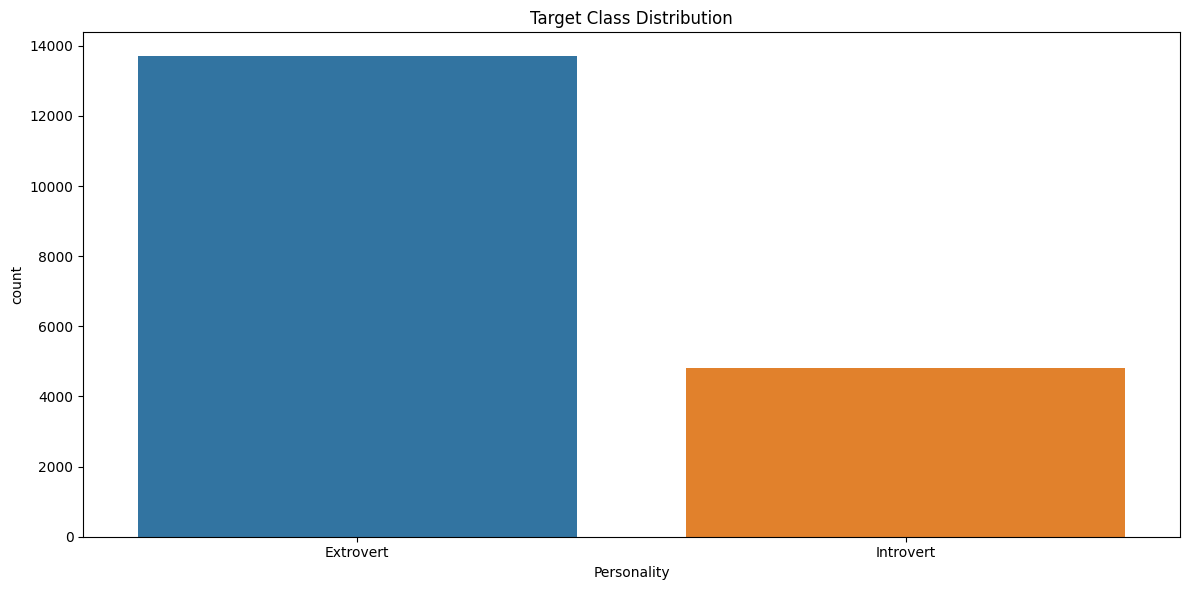

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='Personality', data=df)
plt.title('Target Class Distribution')
plt.tight_layout()
plt.show()

# **Data Preprocessing**

## Handling Missing Values

In [12]:
# Fill numerical columns with median
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
# Fill categorical columns with mode
cat_cols = ['Stage_fear', 'Drained_after_socializing']
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

## Encoding Categorical Variables

In [13]:
# Label encode binary categorical features
cols = ['Stage_fear', 'Drained_after_socializing']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

# Label encode the target separately
df['Personality_Encoded'] = le.fit_transform(df['Personality'])


## Splitting Dataset

In [14]:
X = df.drop(['Personality', 'Personality_Encoded'], axis=1)
y = df['Personality_Encoded']

## Handling Imbalanced Target Data

In [15]:
#checking imbalance
print(y.value_counts(normalize=True) * 100)

Personality_Encoded
0    73.95271
1    26.04729
Name: proportion, dtype: float64


In [16]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

##  Train-test split (using train dataset)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, 
    y_resampled, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_resampled)

# **Training Model**

## Random Forest Classifier

In [18]:
rf_model = RandomForestClassifier(random_state=42)
rf_model

RandomForestClassifier(random_state=42)

In [19]:
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

In [20]:
#evaluation 
print("Classification Report:")
print(classification_report(y_test, y_rf_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2740
           1       0.98      0.98      0.98      2740

    accuracy                           0.98      5480
   macro avg       0.98      0.98      0.98      5480
weighted avg       0.98      0.98      0.98      5480



## CatBoostClassifier

In [21]:
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model

In [22]:
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_test)

In [23]:
print("CatBoost Classification Report:")
print(classification_report(y_test, cat_preds))

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2740
           1       0.98      0.98      0.98      2740

    accuracy                           0.98      5480
   macro avg       0.98      0.98      0.98      5480
weighted avg       0.98      0.98      0.98      5480



## LightGBM (LGBMClassifier)

In [24]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model

LGBMClassifier(random_state=42)

In [25]:
lgbm_model.fit(X_train, y_train)
lgbm_preds = lgbm_model.predict(X_test)

[LightGBM] [Info] Number of positive: 10959, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1534
[LightGBM] [Info] Number of data points in the train set: 21918, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [26]:
print("LightGBM Classification Report:")
print(classification_report(y_test, lgbm_preds))

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2740
           1       0.98      0.98      0.98      2740

    accuracy                           0.98      5480
   macro avg       0.98      0.98      0.98      5480
weighted avg       0.98      0.98      0.98      5480



## XGBoostClassifier

In [27]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [28]:
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [29]:
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2740
           1       0.98      0.98      0.98      2740

    accuracy                           0.98      5480
   macro avg       0.98      0.98      0.98      5480
weighted avg       0.98      0.98      0.98      5480



# Saving the models

In [30]:
# Save RandomForest
joblib.dump(rf_model,'randomforest_model.pkl')

# Save CatBoost
joblib.dump(cat_model, 'catboost_model.pkl')

# Save LightGBM
joblib.dump(lgbm_model, 'lightgbm_model.pkl')

# Save XGBoost
joblib.dump(xgb_model, 'xgboost_model.pkl')


['xgboost_model.pkl']

# Final CSV File